## Load fill and beam modes

In [1]:
%pylab notebook
import pytimber
import datetime
import pickle
import pagestore
import time, calendar

Populating the interactive namespace from numpy and matplotlib


In [2]:
filln=4855

mdb=pytimber.LoggingDB(source='mdb')
db=pagestore.PageStore('lhc.db','//afs/cern.ch/user/n/nbiancac/ln_work/scratch0/MD')    

ts1=mdb.getLHCFillData(fill_number=filln)['startTime']
ts2=mdb.getLHCFillData(fill_number=filln)['endTime']

print 'ts1 = '+time.strftime("%b %d %Y %H:%M:%S", time.localtime(ts1))
print 'ts2 = '+time.strftime("%b %d %Y %H:%M:%S", time.localtime(ts2))

ts1 = Apr 23 2016 19:37:45
ts2 = Apr 23 2016 22:59:32


### Getting data from Timber and stored in Pagestore

In [ ]:
# BCT
import LHC_BCT
data=mdb.get(LHC_BCT.variable_list(beams=[1,2]),ts1,ts2)
db.store(data)

In [ ]:
# BBQ
import LHC_BBQ
data=mdb.get(LHC_BBQ.variable_list(beams=[1,2]),ts1,ts2)
db.store(data)

In [20]:
# BBQ RAW
import LHC_BBQ
times=linspace(ts1,ts2,40)
for ii in np.arange(1,len(times)-1):
    data=mdb.get(LHC_BBQ.variable_list_RAW(beams=[2]),times[ii],times[ii+1])
    db.store(data)

Rebalance LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H
Rebalance LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_H
Rebalance LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_V
Merging 2 pages
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V
Merging 2 pages
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H
Merging 2 pages
Rebalance LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_H
Merging 2 pages
Rebalance LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H
Rebalance LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_H
Rebalance LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_V
Merging 2 pages
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V
Merging 2 pages
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H
Merging 2 pages
Rebalance LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_H
Merging 2 pages
Rebalance LHC.BQBBQ.CONTINUOUS.B2:ACQ_DATA_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B

In [ ]:
# BSRT
import LHC_BSRT
for ii in np.arange(len(times)-1):
    data=mdb.get(LHC_BSRT.variable_list(beams=[1,2]),times[ii],times[ii+1])
    db.store(data)

In [ ]:
# BQM
import LHC_BQM
data=mdb.get(LHC_BQM.variable_list(beams=[1,2]),ts1,ts2)
db.store(data)

In [ ]:
# FBCT
times=linspace(ts1,ts2,40)
for ii in np.arange(len(times)-1):
    data=mdb.get(LHC_FBCT.variable_list(beams=[1,2]),times[ii],times[ii+1])
    db.store(data)

In [ ]:
# Energy
import LHC_Energy
data=mdb.get(LHC_Energy.variable_list(beams=[1,2]),ts1,ts2)
db.store(data)

In [ ]:
import LHC_Coll
data=mdb.get(LHC_Coll.variable_list(beam=1),ts1,ts2)
db.store(data)
data=mdb.get(LHC_Coll.variable_list(beam=2),ts1,ts2)
db.store(data)

### Retrieve data from database and start analysis

In [21]:
import LHC_BBQ, LHC_BCT, LHC_Energy, LHC_Coll, LHC_BQM, LHC_BSRT, LHC_FBCT

output_path='/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/TCSG6.5s_MD/'
tag='TCSG_6.5s_scan'
beam=2
ts1 = calendar.timegm(time.strptime("2016-04-23 21:05:00","%Y-%m-%d %H:%M:%S"))-2*3600
ts2 = calendar.timegm(time.strptime("2016-04-23 21:40:00","%Y-%m-%d %H:%M:%S"))-2*3600



<IPython.core.display.Javascript object>


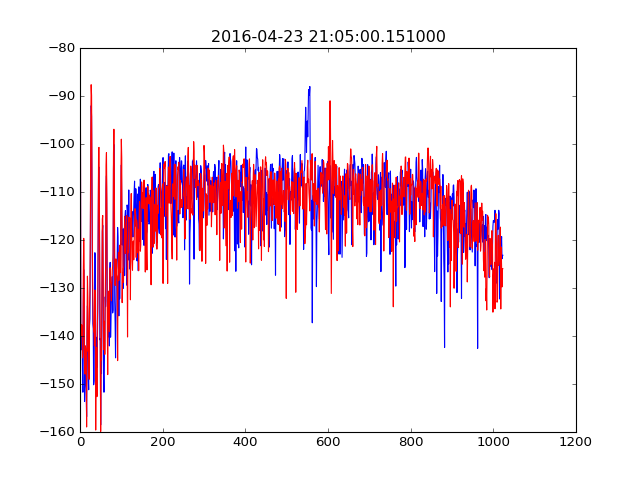

<IPython.core.display.Javascript object>


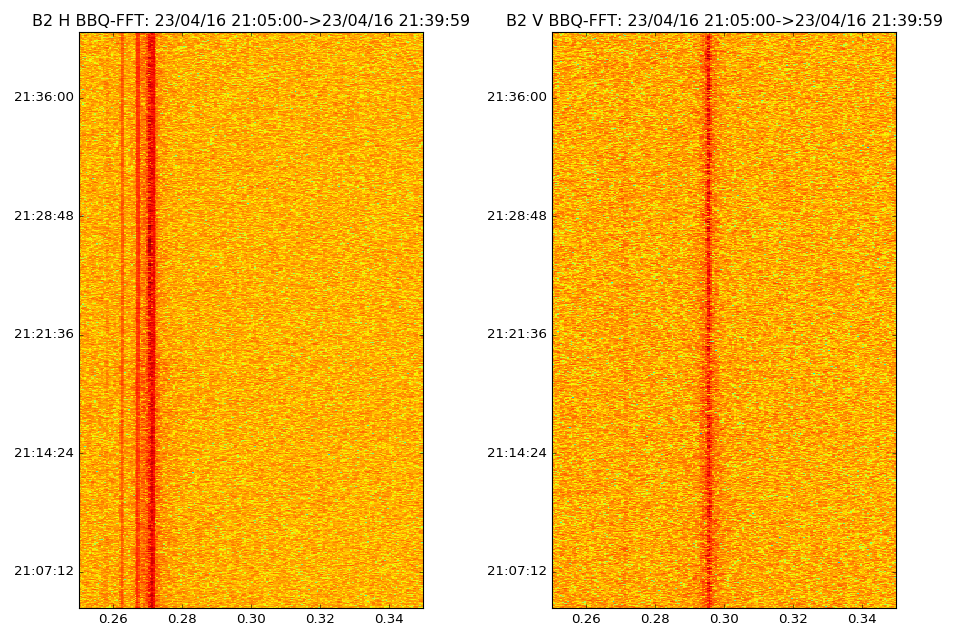

In [41]:
# BBQ
data=db.get(LHC_BBQ.variable_list(beams=[1,2]),ts1,ts2)
BBQ=LHC_BBQ.BBQ(data,beam=beam)
BBQ_FFT=LHC_BBQ.BBQ_FFT(data,beam=beam)


figure()
plot( (BBQ_FFT.fft_h[0]), "-" )
plot( (BBQ_FFT.fft_v[0]), "-r" )
title(BBQ_FFT.t_str[0])

# Waterfall
figure(figsize=(12,8))
subplot(121)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_h, origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d H BBQ-FFT: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_FFT.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

xlim(0.25, 0.35)

subplot(122)
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_v, origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d V BBQ-FFT: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_FFT.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

xlim(0.25, 0.35)
tight_layout()

In [42]:
# RAW BBQ
data=db.get(LHC_BBQ.variable_list_RAW(beams=[beam]),ts1,ts2)
BBQ_RAW=LHC_BBQ.BBQG_RAW(data,beam=beam)

<IPython.core.display.Javascript object>


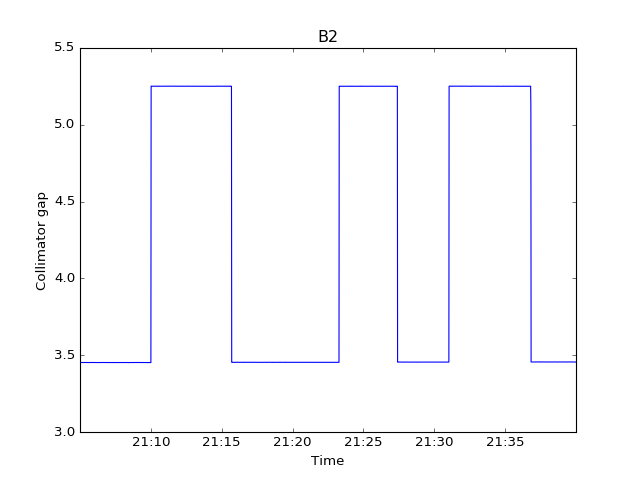

In [43]:
# Collimators
data=db.get(LHC_Coll.variable_list(beam),ts1,ts2)

Coll=LHC_Coll.Coll(data,beam=beam)
typecoll=['R','L']
Coll.select_coll('TCSG.A4'+typecoll[beam-1]+'7.B'+str(beam)+':MEAS_LVDT_GU')

figure()
plot(Coll.t_str, Coll.values, "-b")
xlabel("Time")
ylabel("Collimator gap")
title('B%d'%(Coll.beam))
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

### Clean uncorrelated noise with SVD cut

In [44]:
# eigval=15;
# U, s, V = np.linalg.svd(BBQ_RAW.v, full_matrices=False)
# s[eigval:-1]=0
# BBQ_RAW.v=np.dot(U,np.dot(np.diag(s),V))

# U, s, V = np.linalg.svd(BBQ_RAW.h, full_matrices=False)
# s[eigval:-1]=0
# BBQ_RAW.h=np.dot(U,np.dot(np.diag(s),V))

# figure()
# subplot(2,1,1)
# semilogx(s)

# subplot(2,1,2)
# plot(BBQ_RAW.v[0],'-r')



###  Sussix

In [45]:
import PySUSSIX as ps

# Sussix settings
nt1=1; nt2=4096;
nharm = 5
[tunex_min, tunex_max] = [0.2697 , 0.2703]
[tuney_min, tuney_max] = [0.2941 , 0.2964]

tunex0 = np.mean(np.array([tunex_min, tunex_max]))
tuney0 = np.mean(np.array([tuney_min, tuney_max]))
ex0 = 1e-3
ey0 = 1e-3

tuney_vec=[];tunex_vec=[];
spec_ox=[]; spec_oy=[]

for ii in np.arange(0, len(BBQ_RAW.v)):
    
    datax=BBQ_RAW.h[ii][nt1:nt2]-np.mean(BBQ_RAW.h[ii][nt1:nt2])
    datay=BBQ_RAW.v[ii][nt1:nt2]-np.mean(BBQ_RAW.v[ii][nt1:nt2])
    spec=ps.Sussix()
    spec.sussix_inp(nt1=nt1,nt2=nt2,tunex=tunex0,tuney=tuney0,ex=ex0,ey=ey0,ir=1,nharm=nharm)
    spec.sussix(datax,0*datax, 
                datay, 0*datay, 
                0*datax, 0*datay)
    

    
    spec.ox=np.abs(spec.ox)
    spec.oy=np.abs(spec.oy)
    
    spec_ox.append(spec.ox[0:nharm-1])
    spec_oy.append(spec.oy[0:nharm-1])

    rangey=np.array([tuney_min, tuney_max])
    spec.oy=spec.oy[(np.abs(spec.oy) < rangey.max()) & (np.abs(spec.oy) > rangey.min())]
    spec.ay=spec.ay[(np.abs(spec.oy) < rangey.max()) & (np.abs(spec.oy) > rangey.min())]

    rangex=np.array([tunex_min, tunex_max])
    spec.ox=spec.ox[(np.abs(spec.ox) < rangex.max()) & (np.abs(spec.ox) > rangex.min())]
    spec.ax=spec.ax[(np.abs(spec.ox) < rangex.max()) & (np.abs(spec.ox) > rangex.min())]
    
    if len(spec.ay):
        tuney=spec.oy[spec.ay.argmax()]
    else:
        tuney=np.NaN
    
    if len(spec.ax):
        tunex=spec.ox[spec.ax.argmax()]
    else:
        tunex=np.NaN
    
    tunex_vec.append(tunex)
    tuney_vec.append(tuney)
    

BBQ_RAW.qh=np.array(tunex_vec)
BBQ_RAW.qv=np.array(tuney_vec)

/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 600 but corresponding boolean dimension is 2
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 600 but corresponding boolean dimension is 3
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 600 but corresponding boolean dimension is 5
/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 600 but corresponding boolean dimension is 2
/afs/cer

<IPython.core.display.Javascript object>


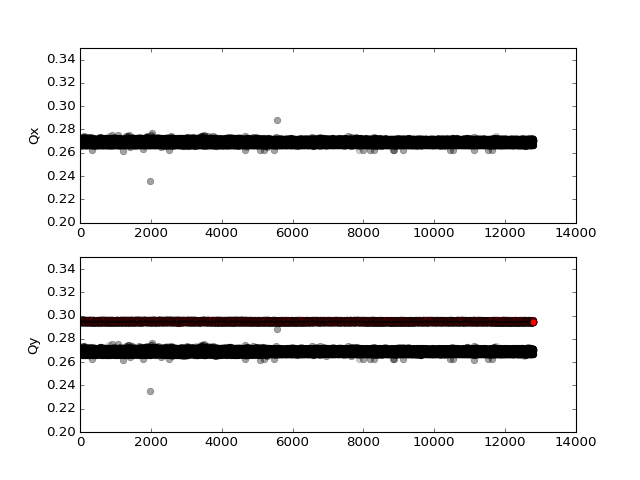

(0.2, 0.35)

In [46]:
# plot tunes
figure()
subplot(2,1,1)
for ii in np.arange(0, len(BBQ_RAW.qh)):
    plot(ii*ones(len(spec_ox[ii])),spec_ox[ii],'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
# plot(BBQ_RAW.qh,'or')
ylabel('Qx')
ylim(0.2 ,0.35)
subplot(2,1,2)
for ii in np.arange(0, len(BBQ_RAW.qv)):
    plot(ii*ones(len(spec_ox[ii])),spec_ox[ii],'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
plot(BBQ_RAW.qv,'or')
ylabel('Qy')
ylim(0.2 ,0.35)

### Interpolate gaps on tune data

In [47]:
# Get rid of the nans...
ind_nan=~np.isnan(BBQ_RAW.qh) & ~np.isnan(BBQ_RAW.qv)
temp_h=BBQ_RAW.qh[ind_nan]
temp_v=BBQ_RAW.qv[ind_nan]
temp_t_stamps=BBQ_RAW.t_stamps[ind_nan]
temp_t_str= np.array(BBQ_RAW.t_str)[ind_nan]

print len(BBQ_RAW.qh), len(BBQ_RAW.qv)

BBQ_RAW.qh=temp_h;
BBQ_RAW.qv=temp_v;
BBQ_RAW.t_stamps= temp_t_stamps
BBQ_RAW.t_str= temp_t_str

print len(BBQ_RAW.qh), len(BBQ_RAW.qv)

# Interpolate collgaps
len(Coll.t_str), len(BBQ_RAW.t_str)
Coll.interp_with(BBQ_RAW)
len(Coll.t_str), len(BBQ_RAW.t_str)

12789 12789
5635 5635


(5635, 5635)

<IPython.core.display.Javascript object>


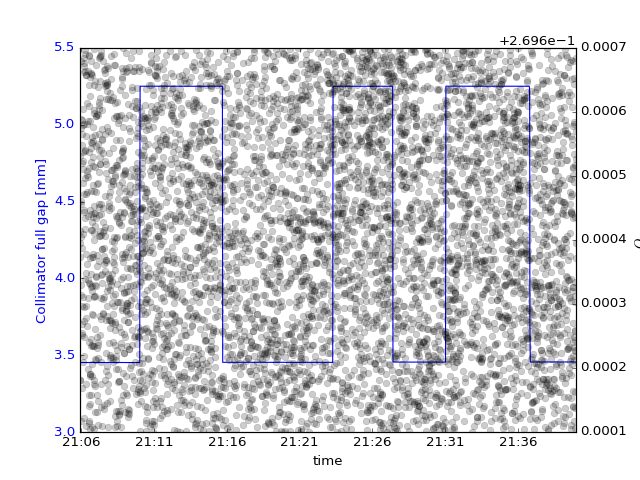

<IPython.core.display.Javascript object>


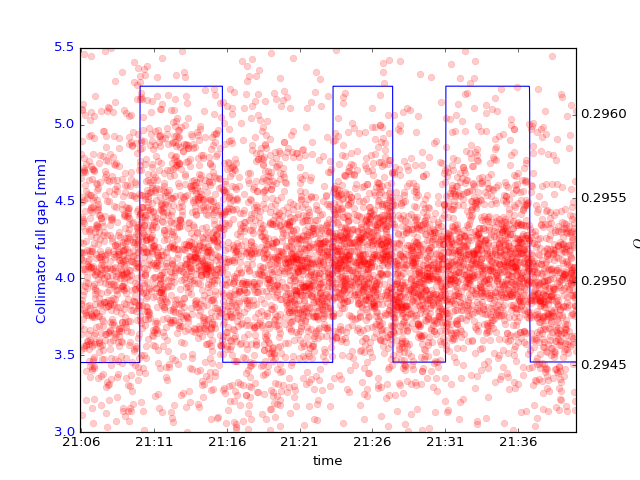

(0.29409999999999997, 0.2964)

In [48]:
fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Collimator full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qh,  'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
ax2.set_ylabel('$Q_x$', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(rangex.min(), rangex.max())

fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Collimator full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qv,  'or',alpha=0.2,markerfacecolor='r',markeredgecolor='r')
ax2.set_ylabel('$Q_y$', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(rangey.min(), rangey.max())

### Moving average

<IPython.core.display.Javascript object>


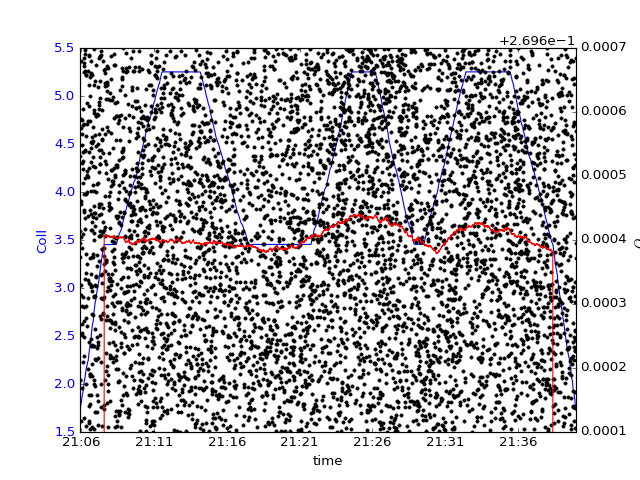

/afs/cern.ch/user/n/nbiancac/scratch0/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


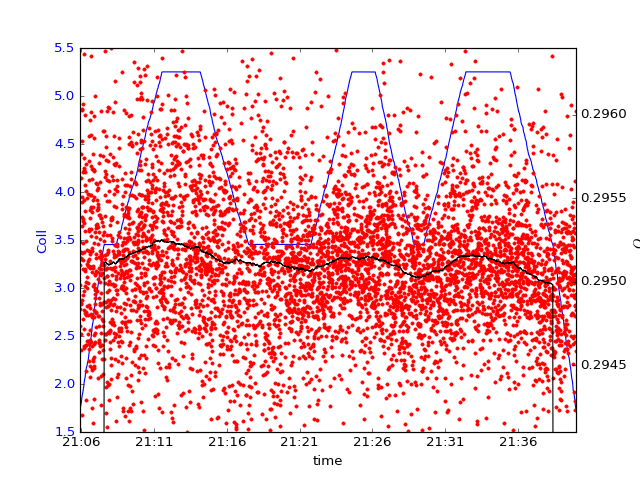

(0.29409999999999997, 0.2964)

In [49]:
N=500

BBQ_RAW.qv_ma=np.convolve(np.ravel(BBQ_RAW.qv), np.ones((N,))/N,mode='same')

BBQ_RAW.qh_ma=np.convolve(np.ravel(BBQ_RAW.qh), np.ones((N,))/N,mode='same')

Coll.values_ma=np.convolve(np.ravel(Coll.values), np.ones((N,))/N,mode='same')

fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qh, 'k.')
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qh_ma, '-r')
ax2.set_ylabel('$Q_x$', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(rangex.min(), rangex.max())

fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Coll', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qv, 'r.')
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qv_ma, '-k')
ax2.set_ylabel('$Q_y$', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(rangey.min(), rangey.max())



1

<IPython.core.display.Javascript object>


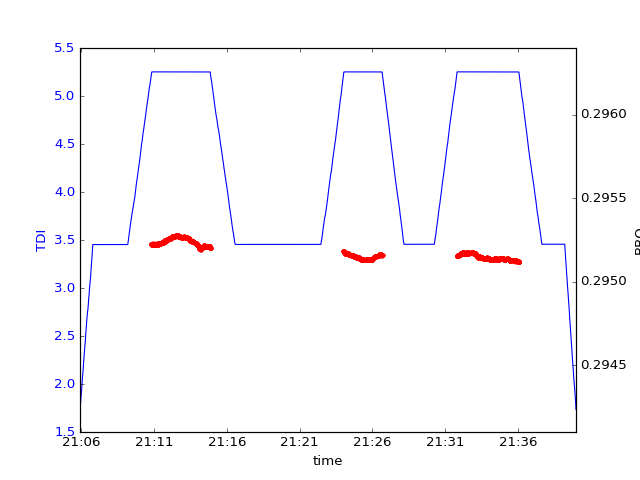

(0.29409999999999997, 0.2964)

In [30]:
gu=5.2;
gd=3.5

mask=(Coll.values_ma>gu) #| (Coll.values<gd)

fig, ax1 = plt.subplots()
ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('TDI', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(np.array(BBQ_RAW.t_str)[mask], BBQ_RAW.qv_ma[mask], 'r.')
ax2.set_ylabel('BBQ', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(rangey.min(), rangey.max())


<IPython.core.display.Javascript object>


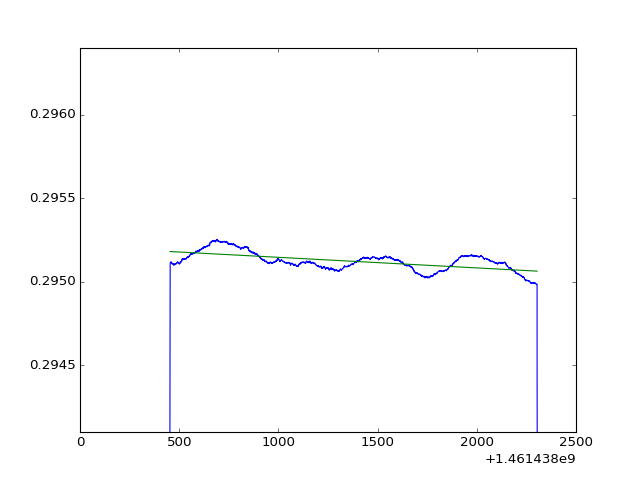

<IPython.core.display.Javascript object>


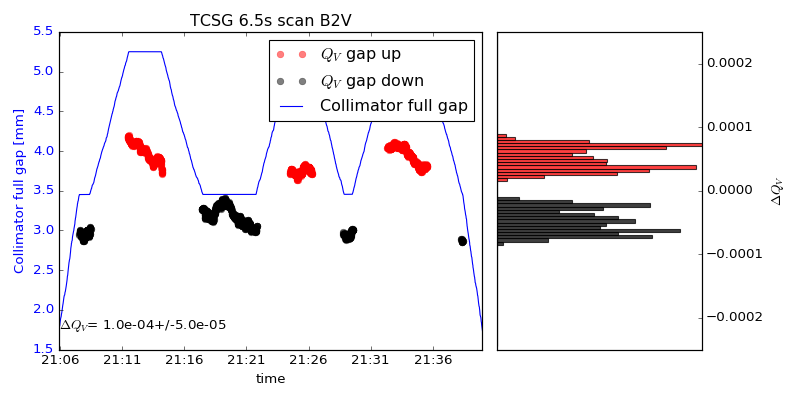

5.2e-05+/-1.7e-05
-4.9e-05+/-3.3e-05
tune shift: 1.0e-04+/-5.0e-05


'/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/TCSG6.5s_MD/TCSG_6.5s_scan_vs_gap_B2V.pdf'

In [50]:
gu=5.2;
gd=3.5
plane='V'

# get out slope from measurement
x=BBQ_RAW.t_stamps
y=BBQ_RAW.qv_ma

mask_tune=(y<tuney_max) & (y>tuney_min)
p=np.polyfit(x[mask_tune],y[mask_tune],1)
slope=p[0]
intercept=p[1]
fit=slope*x+intercept

figure()
plot(BBQ_RAW.t_stamps,BBQ_RAW.qv_ma)
plot(BBQ_RAW.t_stamps[mask_tune],fit[mask_tune])
ylim(tuney_min, tuney_max)

# Upper gap
mask1=(Coll.values_ma>gu) 
x=BBQ_RAW.t_stamps[mask1]
y=BBQ_RAW.qv_ma[mask1]
fit1=fit[mask1]

mask_tune=(y<tuney_max) & (y>tuney_min)

y1=y-fit1
y1_mean=np.mean(y1[mask_tune])
y1_std=np.std(y1[mask_tune])

# Lower gap
mask2=(Coll.values_ma<gd) 
x=BBQ_RAW.t_stamps[mask2]
y=BBQ_RAW.qv_ma[mask2]

fit2=fit[mask2]
mask_tune=(y<tuney_max) & (y>tuney_min)

y2=y-fit2
y2_mean=np.mean(y2[mask_tune])
y2_std=np.std(y2[mask_tune])

ts_mean=y1_mean- y2_mean
ts_std=y1_std+y2_std

figure(figsize=(10,5), facecolor='white')
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
h2, = ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Collimator full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
ax1.annotate('$\Delta Q_'+plane+'$= %.1e+/-%.1e'%(ts_mean,ts_std),xy=(Coll.t_str[5], Coll.values_ma[5]))
title(tag.replace('_',' ')+' B'+str(beam)+plane)
ax2 = ax1.twinx()
h0, = ax2.plot(np.array(BBQ_RAW.t_str)[mask1], y1, 'or',alpha=0.5,markerfacecolor='r',markeredgecolor='r')
h1, = ax2.plot(np.array(BBQ_RAW.t_str)[mask2][mask_tune], y2[mask_tune], 'ok',alpha=.5,markerfacecolor='k',markeredgecolor='k')
ax2.set_ylim(-2.5e-4, 2.5e-4)
ax2.yaxis.set_ticks([])

legend([h0, h1, h2],['$Q_'+plane+'$ gap up' , '$Q_'+plane+'$ gap down', 'Collimator full gap'])


# distribution
ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
ax1.set_ylim(-2.5e-4, 2.5e-4)
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks([])

ax2=ax1.twinx()
n, bins, patches = hist(y1, 100, range = (-2.5e-4, 2.5e-4), normed=1, facecolor='r', alpha=0.75, orientation="horizontal")
n, bins, patches = hist(y2, 100, range = (-2.5e-4, 2.5e-4), normed=1, facecolor='k', alpha=0.75, orientation="horizontal")
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks([-2e-4, -1e-4, 0, 1e-4, 2e-4])
ax2.set_ylabel('$\Delta Q_'+plane+'$')
ax2.set_ylim(-2.5e-4, 2.5e-4)
tight_layout()


print '%.1e+/-%.1e'%(y1_mean,y1_std)
print '%.1e+/-%.1e'%(y2_mean,y2_std)
print 'tune shift: %.1e+/-%.1e'%(ts_mean,ts_std)

savefig(output_path+tag+'_vs_gap_B'+str(beam)+plane+'.pdf', transparent=True)
savefig(output_path+tag+'_vs_gap_B'+str(beam)+plane+'.png', transparent=True)
output_path+tag+'_vs_gap_B'+str(beam)+plane+'.pdf'

<IPython.core.display.Javascript object>


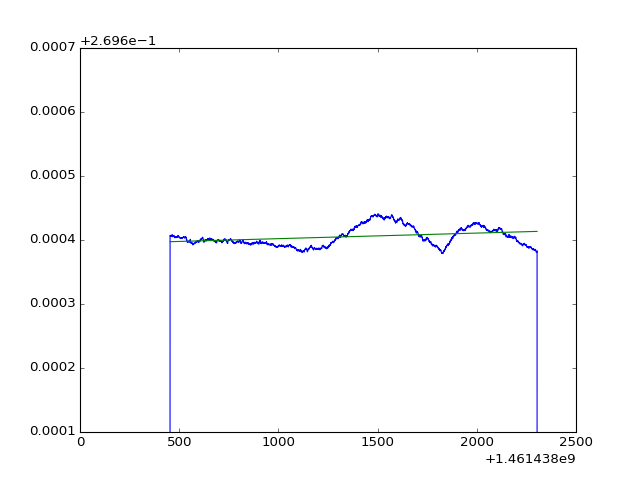

<IPython.core.display.Javascript object>


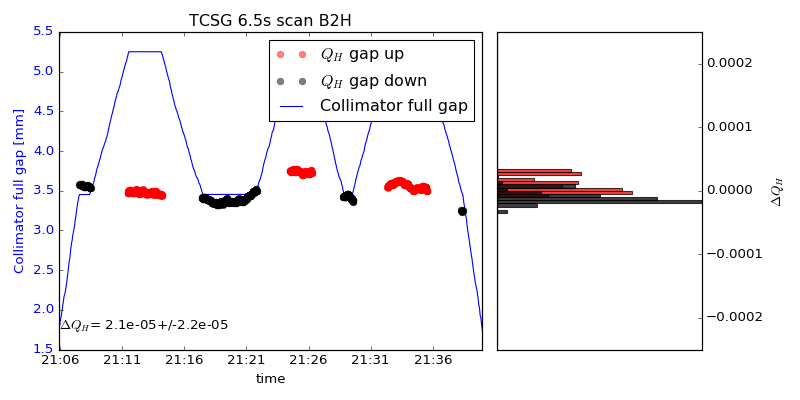

9.9e-06+/-1.3e-05
-1.1e-05+/-9.1e-06
tune shift: 2.1e-05+/-2.2e-05


'/afs/cern.ch/user/n/nbiancac/ln_work/scratch0/DELPHI_results/LHC/TCSG6.5s_MD/TCSG_6.5s_scan_vs_gap_B2H.pdf'

In [51]:
gu=5.2;
gd=3.5
plane='H'

# get out slope from measurement
x=BBQ_RAW.t_stamps
y=BBQ_RAW.qh_ma

mask_tune=(y<tunex_max) & (y>tunex_min)
p=np.polyfit(x[mask_tune],y[mask_tune],1)
slope=p[0]
intercept=p[1]
fit=slope*x+intercept

figure()
plot(BBQ_RAW.t_stamps,BBQ_RAW.qh_ma)
plot(BBQ_RAW.t_stamps[mask_tune],fit[mask_tune])
ylim(tunex_min, tunex_max)

# Upper gap
mask1=(Coll.values_ma>gu) 
x=BBQ_RAW.t_stamps[mask1]
y=BBQ_RAW.qh_ma[mask1]
fit1=fit[mask1]

mask_tune=(y<tunex_max) & (y>tunex_min)

y1=y-fit1
y1_mean=np.mean(y1[mask_tune])
y1_std=np.std(y1[mask_tune])

# Lower gap
mask2=(Coll.values_ma<gd) 
x=BBQ_RAW.t_stamps[mask2]
y=BBQ_RAW.qh_ma[mask2]

fit2=fit[mask2]
mask_tune=(y<tunex_max) & (y>tunex_min)

y2=y-fit2
y2_mean=np.mean(y2[mask_tune])
y2_std=np.std(y2[mask_tune])

ts_mean=y1_mean- y2_mean
ts_std=y1_std+y2_std

figure(figsize=(10,5), facecolor='white')
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
h2, = ax1.plot(Coll.t_str, Coll.values_ma, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Collimator full gap [mm]', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
ax1.annotate('$\Delta Q_'+plane+'$= %.1e+/-%.1e'%(ts_mean,ts_std),xy=(Coll.t_str[5], Coll.values_ma[5]))
title(tag.replace('_',' ')+' B'+str(beam)+plane)
ax2 = ax1.twinx()
h0, = ax2.plot(np.array(BBQ_RAW.t_str)[mask1], y1, 'or',alpha=0.5,markerfacecolor='r',markeredgecolor='r')
h1, = ax2.plot(np.array(BBQ_RAW.t_str)[mask2][mask_tune], y2[mask_tune], 'ok',alpha=.5,markerfacecolor='k',markeredgecolor='k')
ax2.set_ylim(-2.5e-4, 2.5e-4)
ax2.yaxis.set_ticks([])

legend([h0, h1, h2],['$Q_'+plane+'$ gap up' , '$Q_'+plane+'$ gap down', 'Collimator full gap'])



# distribution
ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
ax1.set_ylim(-2.5e-4, 2.5e-4)
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks([])

ax2=ax1.twinx()
n, bins, patches = hist(y1, 100, range = (-2.5e-4, 2.5e-4), normed=1, facecolor='r', alpha=0.75, orientation="horizontal")
n, bins, patches = hist(y2, 100, range = (-2.5e-4, 2.5e-4), normed=1, facecolor='k', alpha=0.75, orientation="horizontal")
ax2.yaxis.tick_right()
ax2.yaxis.set_ticks([-2e-4, -1e-4, 0, 1e-4, 2e-4])
ax2.set_ylabel('$\Delta Q_'+plane+'$')
ax2.set_ylim(-2.5e-4, 2.5e-4)
tight_layout()


print '%.1e+/-%.1e'%(y1_mean,y1_std)
print '%.1e+/-%.1e'%(y2_mean,y2_std)
print 'tune shift: %.1e+/-%.1e'%(ts_mean,ts_std)

savefig(output_path+tag+'_vs_gap_B'+str(beam)+plane+'.pdf', transparent=True)
savefig(output_path+tag+'_vs_gap_B'+str(beam)+plane+'.png', transparent=True)
output_path+tag+'_vs_gap_B'+str(beam)+plane+'.pdf'

In [88]:
ax1.annotate?

In [22]:
hist?